# Machine Learning

## Libraries

In [24]:
from typing import Any

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC

pd.set_option("display.max_columns", 30)
pd.set_option("display.width", 1440)

## Load processed dataframe

In [10]:
dataframe: pd.DataFrame = pd.read_csv("../data/processed/data.csv")
dataframe

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,No
1,Male,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,No
2,Male,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,Yes
3,Male,False,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,No
4,Female,False,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,False,True,True,24,True,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,True,Mailed check,84.80,1990.50,No
7039,Female,False,True,True,72,True,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,True,Credit card (automatic),103.20,7362.90,No
7040,Female,False,True,True,11,False,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,True,Electronic check,29.60,346.45,No
7041,Male,True,True,False,4,True,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Mailed check,74.40,306.60,Yes


In [11]:
df_dummies: pd.DataFrame = pd.read_csv("../data/processed/df_dummies.csv")
df_dummies

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,1,0,0,1,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,1,0,1,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


## Preprocessing

In [12]:
y: np.ndarray = df_dummies['Churn'].values
x: pd.DataFrame = df_dummies.drop(columns=['Churn'])

features: np.ndarray = x.columns.values
scaler: MinMaxScaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=99
)

## Pipeline

In [13]:
pipeline: Pipeline = Pipeline(
    [('scaler', StandardScaler()), ('svc', SVC(random_state=42))]
)

In [14]:
# Define a grid of parameters to search
param_grid: dict[str, list[Any]] = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
}

In [15]:
# Initialize GridSearchCV
grid_search_cv: GridSearchCV = GridSearchCV(
    pipeline, param_grid, scoring='accuracy', cv=5
)

In [16]:
# Fit GridSearchCV
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [17]:
# Get the best model
best_model: Pipeline = grid_search_cv.best_estimator_

<class 'sklearn.pipeline.Pipeline'>


In [22]:
print(best_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=100, kernel='linear', random_state=42))])


## Machine Learning models

### Support Vector Machine (SVM)

In [18]:
# Predict on the test data
y_pred: np.ndarray = best_model.predict(x_test)

In [19]:
# Calculate accuracy
accuracy_classification_score: float = accuracy_score(y_test, y_pred)
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_cv.best_score_}")
print(f"Test set accuracy: {accuracy_classification_score}")

Best parameters: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation accuracy: 0.7992543746975971
Test set accuracy: 0.7863733144073811


In [20]:
print(confusion_matrix(y_test, y_pred))

[[913 110]
 [191 195]]


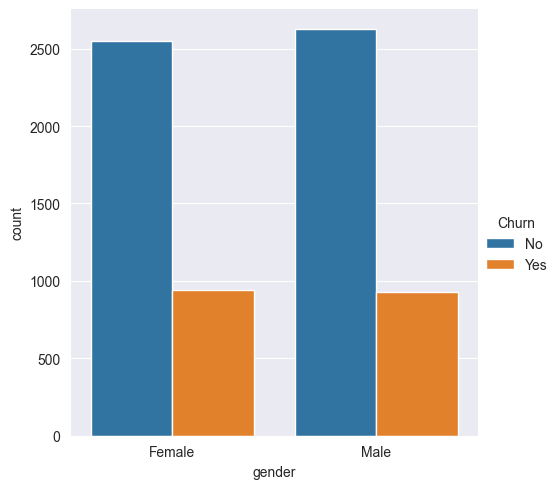

In [21]:
ax1 = sns.catplot(
    data=dataframe,
    x="gender",
    hue="Churn",
    kind="count",
    estimator=lambda e: sum(e == 0) * 100.0 / len(e),
)

### Gradient Boosting Machines (GBM)

In [27]:
# Initialize the GBM model
gbm: GradientBoostingClassifier = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42
)
gbm.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [28]:
# Predict on the test data
y_pred: np.ndarray = gbm.predict(x_test)

In [29]:
# Calculate accuracy
accuracy_classification_score: float = accuracy_score(y_test, y_pred)
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_cv.best_score_}")
print(f"Test set accuracy: {accuracy_classification_score}")

Best parameters: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation accuracy: 0.7992543746975971
Test set accuracy: 0.7991483321504613


In [30]:
### Generalized Additive Models (GAM)

- Check docs at: https://www.statsmodels.org/dev/gam.html

In [31]:
print("GAM")

GAM


### Adaptive Boosting (AdaBoost)

In [32]:
ada_boost: AdaBoostClassifier = AdaBoostClassifier()
ada_boost.fit(x_train, y_train)

C:\Users\juanp\PycharmProjects\PrDS_2024__TelcoCustomerChurn\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [33]:
# Predict on the test data
y_pred: np.ndarray = gbm.predict(x_test)

In [34]:
# Calculate accuracy
accuracy_classification_score: float = accuracy_score(y_test, y_pred)
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_cv.best_score_}")
print(f"Test set accuracy: {accuracy_classification_score}")

Best parameters: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation accuracy: 0.7992543746975971
Test set accuracy: 0.7991483321504613
